# Problem set 4: Classification models performance, cross-validation

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import sklearn.metrics 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 4.1 Confusion matrix

Prepare two confusion matrices (`sklearn.metrics.ConfusionMatrixDisplay`) for the models analysed in Problem 3.4: (1) with scaled data; (2) with original (unscaled data). Make sure you can re-create the numbers from the matrices.

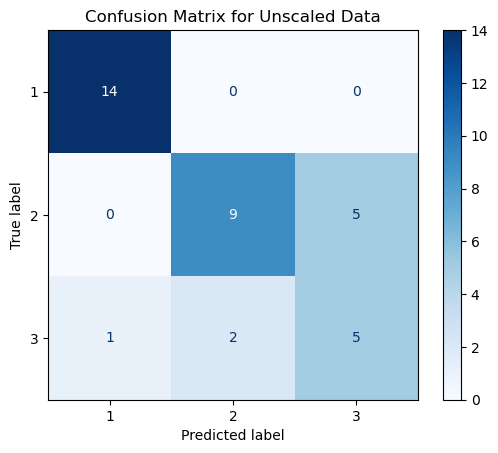

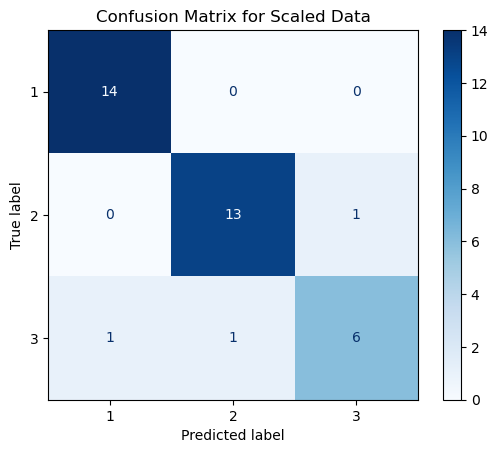

5
1


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('data/wine.data',header = None)
df = df.drop(df.columns[2:13], axis=1)
df.columns = ['target','alcohol','proline']

X = df[['alcohol','proline']]
y = df['target']

# Assuming X, y are already defined as dataframes
# X contains features 'alcohol' and 'proline', y contains target labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (1) KNN on unscaled data
k = 20
knn_unscaled = KNeighborsClassifier(n_neighbors=k)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)


# (2) KNN on scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=k)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)


# Display confusion matrix for unscaled data
disp_unscaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_unscaled, display_labels=np.unique(y))
disp_unscaled.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Unscaled Data")
plt.show()

# Display confusion matrix for scaled data
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled, display_labels=np.unique(y))
disp_scaled.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Scaled Data")
plt.show()



# to get values from conf_matrix
print(conf_matrix_unscaled[1][2])
print(conf_matrix_scaled[1][2])

## 4.2 Precision, recall and $f_1$ score

For the models from Problem 4.1, prepare classification report (`sklearn.metrics.classification_report`). Check the definitions of all metrics presented in the tables. How does the values relate to the result of the estimator `score` method?

In [81]:
from sklearn.metrics import classification_report
print('UNSCALED DATA\n',classification_report(y_test, y_pred_unscaled))
print('SCORE FOR UNSCALED KNN:\n',knn_unscaled.score(X_test, y_test))

print('\n\nSCALED DATA\n',classification_report(y_test, y_pred_scaled))
print('SCORE FOR SCALED KNN:\n',knn_scaled.score(X_test_scaled, y_test))

# precision  - tp / tp+fp   talks about how much we can trust the predicted values
# recall/sensitivity =  tp / tp+fn "Out of all the actual positive items, how many did the classifier correctly identify?
# f1 = harmonic mean of precision and recall.
# the support column return the amount of instances of each class

# macro - average along all classes regardless of the proportion of classes
# weighted - weighted avg of classes

# the score method 

UNSCALED DATA
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.82      0.64      0.72        14
           3       0.50      0.62      0.56         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36

SCORE FOR UNSCALED KNN:
 0.7777777777777778


SCALED DATA
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.93      0.93      0.93        14
           3       0.86      0.75      0.80         8

    accuracy                           0.92        36
   macro avg       0.91      0.89      0.90        36
weighted avg       0.91      0.92      0.91        36

SCORE FOR SCALED KNN:
 0.9166666666666666


## 4.3 Choosing the best parameter by cross-validation

For 'wine' dataset find the best parameter $k$ using cross-validation (`GridSearchCV`). Remember of scaling the data. Prepare a confusion matrix for the best model.

More on $k$-fold cross-validation

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

best params:  {'n_neighbors': 3}
acuracy for best params: 0.9444444444444444
Confusion Matrix for the Best Model  [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


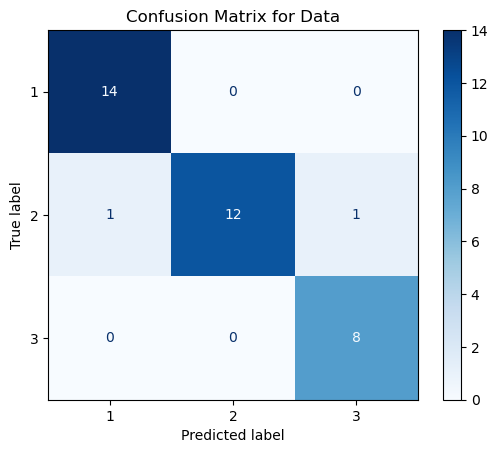

In [82]:

# Load the wine dataset
wine_data = pd.read_csv('data/wine.data', header = None) 

# Split features and target
X = wine_data.drop(columns=[0])
y = wine_data[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for k
param_grid = {'n_neighbors': np.arange(1, 10)}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN classifier with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test dataset
y_pred = best_knn.predict(X_test_scaled)

# Prepare confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred)

print('best params: ', grid_search.best_params_)
print('acuracy for best params:', best_knn.score(X_test_scaled, y_test))
print('Confusion Matrix for the Best Model ',conf_matrix)


# Display confusion matrix for scaled data
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp_scaled.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Data")
plt.show()

# 4.4 Visualising the cross-validation results

Plot the cross-validation results from Problem 3.1. You can use `cv_results_` attribute of `GridSearchCV` object.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000311,0.000028,0.000819,0.000046,1,{'n_neighbors': 1},1.000000,0.931034,0.928571,0.964286,0.928571,0.950493,0.028217,5
1,0.000281,0.000002,0.000791,0.000014,2,{'n_neighbors': 2},0.896552,0.931034,0.964286,0.964286,0.928571,0.936946,0.025423,8
2,0.000281,0.000002,0.000782,0.000010,3,{'n_neighbors': 3},0.965517,0.965517,0.964286,0.964286,0.928571,0.957635,0.014542,1
3,0.000278,0.000001,0.000786,0.000007,4,{'n_neighbors': 4},0.931034,1.000000,0.964286,0.928571,0.928571,0.950493,0.028217,5
4,0.000280,0.000002,0.000805,0.000027,5,{'n_neighbors': 5},0.896552,0.965517,0.928571,0.964286,1.000000,0.950985,0.035372,2
5,0.000279,0.000002,0.000791,0.000008,6,{'n_neighbors': 6},0.931034,0.931034,0.928571,0.964286,1.000000,0.950985,0.027849,2
6,0.000278,0.000002,0.000794,0.000009,7,{'n_neighbors': 7},0.965517,0.931034,0.928571,0.928571,1.000000,0.950739,0.028341,4
7,0.000278,0.000001,0.000801,0.000015,8,{'n_neighbors': 8},0.931034,0.931034,0.928571,0.928571,1.000000,0.943842,0.028100,7
8,0.000277,0.000001,0.000814,0.000025,9,{'n_neighbors': 9},0.896552,0.931034,0.928571,0.928571,1.000000,0.936946,0.034008,8


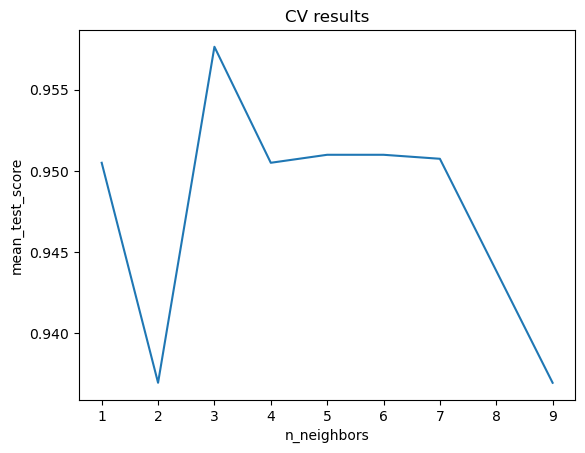

In [100]:
import matplotlib.pyplot as plt


cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results)

cv_results['param_n_neighbors']
plt.plot(cv_results['param_n_neighbors'],cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('mean_test_score')
plt.title('CV results')
plt.show()

# 4.5 Stability of the cross-validated best parameter

Repeat the analysis from problem 4.4 with different train-test split. How would you assess the overall sensitivity of KNN algorithm?

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from ipywidgets import interact, IntSlider, FloatSlider

# Define the function to encapsulate your code
def analyze_data(n_neighbors, ts):
    # Read data
    df = pd.read_csv('data/wine.data', header=None)
    df = df.drop(df.columns[2:13], axis=1)
    df.columns = ['target', 'alcohol', 'proline']

    # Split features and target
    X = df[['alcohol', 'proline']]
    y = df['target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid for k
    param_grid = {'n_neighbors': np.arange(1, n_neighbors + 1)}

    # Initialize KNN classifier
    knn = KNeighborsClassifier()

    # Perform GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameter
    best_k = grid_search.best_params_['n_neighbors']

    # Train the KNN classifier with the best k
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train_scaled, y_train)

    # Make predictions on the test dataset
    y_pred = best_knn.predict(X_test_scaled)

    # Prepare confusion matrix for the best model
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print('Best params:', grid_search.best_params_)
    print('Accuracy for best params:', best_knn.score(X_test_scaled, y_test))
    print('Confusion Matrix for the Best Model:', conf_matrix)

    # Plot CV results
    cv_results = pd.DataFrame(grid_search.cv_results_)
    plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
    plt.xlabel('n_neighbors')
    plt.ylabel('mean_test_score')
    plt.title('CV results')
    plt.show()

# Create interactive plot with sliders for n_neighbors and ts
interact(analyze_data, n_neighbors=IntSlider(min=1, max=30, step=1, value=5), ts=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.3))


interactive(children=(IntSlider(value=5, description='n_neighbors', max=30, min=1), FloatSlider(value=0.3, des…

<function __main__.analyze_data(n_neighbors, ts)>